In [1]:
#IMPORTS

import numpy as np
import pandas as pd 

from imblearn.over_sampling import SMOTE 

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,7)


import time

# 1:<span style='background :yellow' ><font color="#902cb7"> **Load data**</font></span>

## <span style='background :yellow' ><font color="#902cb7"> **Train data**</font></span>

In [5]:
# Training data
application_train = pd.read_csv('data_p7/application_train.csv')
print('Training data shape: ', application_train.shape)
application_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## <span style='background :yellow' ><font color="#902cb7"> **Test data**</font></span>

In [7]:
# Testing data features
application_test = pd.read_csv('data_p7/application_test.csv')
print('Testing data shape: ', application_test.shape)
application_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

# 2: <span style='background :yellow' ><font color="#902cb7"> **Data process**</font></span>

In [9]:
# removal of SK_ID_CURR

# Train
SK_ID_CURR_train = application_train['SK_ID_CURR']
application_train = application_train.drop('SK_ID_CURR',axis = 1)

# Test
SK_ID_CURR_test = application_test['SK_ID_CURR']
application_test = application_test.drop('SK_ID_CURR',axis = 1)


In [10]:
print('Train :' , application_train['TARGET'].value_counts())

Train : 0    282686
1     24825
Name: TARGET, dtype: int64


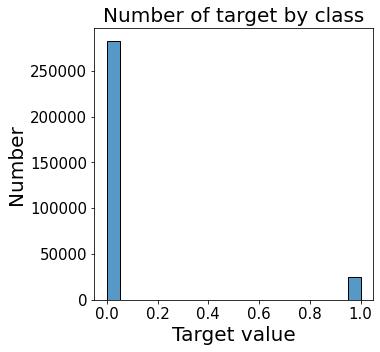

In [16]:
plt.figure(figsize=(5,5))

b = sns.histplot(data=application_train, x="TARGET")
b.axes.set_title("Number of target by class",fontsize=20)
b.set_xlabel("Target value",fontsize=20)
b.set_ylabel("Number",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

### <span style='background :yellow' ><font color="#902cb7"> ** We have less than 9% of categorie 1. **</font></span>

In [17]:
print('number of raw in train data with no Nan is :',application_train.dropna().shape[0])

number of raw in train data with no Nan is : 8602


In [18]:
# select numeric columns

application_train_numeric = application_train.select_dtypes(include=[np.number])
numeric_cols_train = application_train_numeric.columns.values

application_test_numeric = application_test.select_dtypes(include=[np.number])
numeric_cols_test = application_test_numeric.columns.values



# select non numeric columns

application_train_non_numeric = application_train.select_dtypes(exclude=[np.number])
non_numeric_cols_train = application_train_non_numeric.columns.values

application_test_non_numeric = application_test.select_dtypes(exclude=[np.number])
non_numeric_cols_test = application_test_non_numeric.columns.values



<AxesSubplot:>

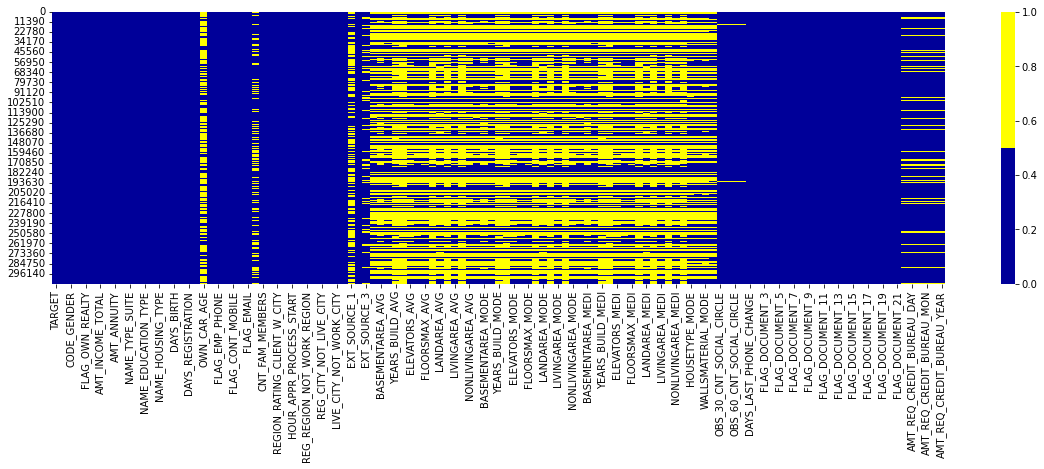

In [19]:
plt.figure(figsize=(20,5))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(application_train.isnull(), cmap=sns.color_palette(colours))

In [20]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.1 <span style='background :yellow' ><font color="#902cb7"> **numeric columns**</font></span>

In [21]:
# % of missing.
for col in application_train_numeric.columns:
    pct_missing = np.mean(application_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


TARGET - 0%
CNT_CHILDREN - 0%
AMT_INCOME_TOTAL - 0%
AMT_CREDIT - 0%
AMT_ANNUITY - 0%
AMT_GOODS_PRICE - 0%
REGION_POPULATION_RELATIVE - 0%
DAYS_BIRTH - 0%
DAYS_EMPLOYED - 0%
DAYS_REGISTRATION - 0%
DAYS_ID_PUBLISH - 0%
OWN_CAR_AGE - 66%
FLAG_MOBIL - 0%
FLAG_EMP_PHONE - 0%
FLAG_WORK_PHONE - 0%
FLAG_CONT_MOBILE - 0%
FLAG_PHONE - 0%
FLAG_EMAIL - 0%
CNT_FAM_MEMBERS - 0%
REGION_RATING_CLIENT - 0%
REGION_RATING_CLIENT_W_CITY - 0%
HOUR_APPR_PROCESS_START - 0%
REG_REGION_NOT_LIVE_REGION - 0%
REG_REGION_NOT_WORK_REGION - 0%
LIVE_REGION_NOT_WORK_REGION - 0%
REG_CITY_NOT_LIVE_CITY - 0%
REG_CITY_NOT_WORK_CITY - 0%
LIVE_CITY_NOT_WORK_CITY - 0%
EXT_SOURCE_1 - 56%
EXT_SOURCE_2 - 0%
EXT_SOURCE_3 - 20%
APARTMENTS_AVG - 51%
BASEMENTAREA_AVG - 59%
YEARS_BEGINEXPLUATATION_AVG - 49%
YEARS_BUILD_AVG - 66%
COMMONAREA_AVG - 70%
ELEVATORS_AVG - 53%
ENTRANCES_AVG - 50%
FLOORSMAX_AVG - 50%
FLOORSMIN_AVG - 68%
LANDAREA_AVG - 59%
LIVINGAPARTMENTS_AVG - 68%
LIVINGAREA_AVG - 50%
NONLIVINGAPARTMENTS_AVG - 69%
NONLIVING

In [22]:
# fill with median values from train data only :

application_train_numeric = application_train_numeric.fillna(application_train_numeric.median())
application_test_numeric = application_test_numeric.fillna(application_train_numeric.median())


### <span style='background :yellow' ><font color="#902cb7"> **Removal of OUTLIERS**</font></span>

In [23]:
application_train_numeric.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [24]:
application_train_numeric = application_train_numeric[(np.abs(stats.zscore(application_train_numeric)) < 10).all(axis=1)]

application_train_numeric = pd.concat([labels, application_train_numeric], axis=1, join="inner")

In [25]:
application_train_numeric.shape

(293114, 105)

In [26]:
application_train_numeric.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### <span style='background :yellow' ><font color="#902cb7"> **Removal of Correlated columns**</font></span>

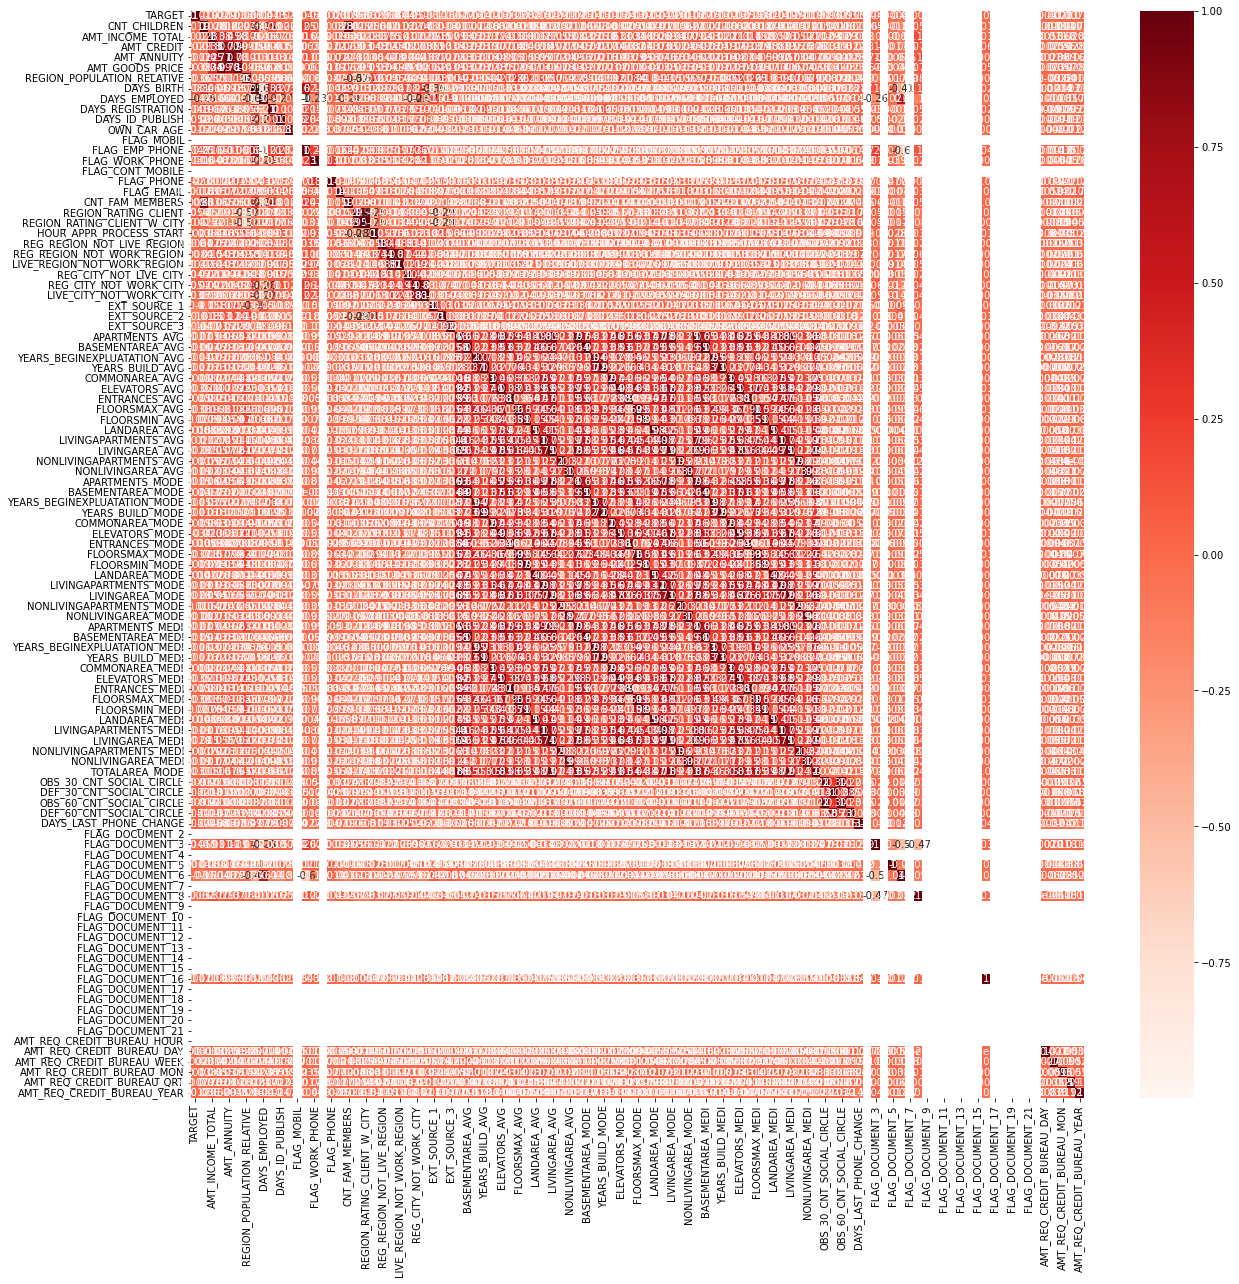

In [27]:
#Pearson Correlation
plt.figure(figsize=(20,20))
cor = application_train_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
# Create correlation matrix
corr_matrix = application_train_numeric.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('The columns removed are :', to_drop)
# Drop features 
application_train_numeric = application_train_numeric.drop(to_drop, axis=1)

The columns removed are : ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE']


In [29]:
application_train_numeric.shape

(293114, 72)

### 2.2 <span style='background :yellow' ><font color="#902cb7"> **Categorical columns**</font></span>

In [30]:
# % of missing.
for col in application_train_non_numeric.columns:
    pct_missing = np.mean(application_train_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


NAME_CONTRACT_TYPE - 0%
CODE_GENDER - 0%
FLAG_OWN_CAR - 0%
FLAG_OWN_REALTY - 0%
NAME_TYPE_SUITE - 0%
NAME_INCOME_TYPE - 0%
NAME_EDUCATION_TYPE - 0%
NAME_FAMILY_STATUS - 0%
NAME_HOUSING_TYPE - 0%
OCCUPATION_TYPE - 31%
WEEKDAY_APPR_PROCESS_START - 0%
ORGANIZATION_TYPE - 0%
FONDKAPREMONT_MODE - 68%
HOUSETYPE_MODE - 50%
WALLSMATERIAL_MODE - 51%
EMERGENCYSTATE_MODE - 47%


In [31]:
# fill with most frequent value 
application_train_non_numeric = application_train_non_numeric.apply(lambda x:x.fillna(x.value_counts().index[0]))

application_test_non_numeric = application_test_non_numeric.apply(lambda x:x.fillna(x.value_counts().index[0]))

### <span style='background :yellow' ><font color="#902cb7"> **Encoding**</font></span>

In [32]:
"""
Checking  how many classes by categorical columns
"""
A = []
for col in application_train_non_numeric.columns:
    A.append(application_train_non_numeric[col].value_counts().count())
df = pd.DataFrame(A, application_train_non_numeric.columns )
df.columns =['Number of Class'] 
df

,Number of Class
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [33]:
application_train_non_numeric = pd.get_dummies(application_train_non_numeric, prefix_sep='_', drop_first=True)
application_train_non_numeric.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### <span style='background :yellow' ><font color="#902cb7"> **Concat both numeric and non-numeric**</font></span>

In [34]:
application_train_final = pd.concat([application_train_numeric, application_train_non_numeric], axis=1, join="inner")

In [35]:
application_train_final.shape

(293114, 196)

In [36]:
application_test_final = pd.concat([application_test_numeric, application_test_non_numeric], axis=1, join="inner")
application_test_final.shape

(48744, 120)

### <span style='background :yellow' ><font color="#902cb7"> **Save the Data**</font></span>

In [37]:
application_train_final.to_csv('application_train_final.csv', index=False)
application_test_final.to_csv('application_test_final.csv', index=False)


#

# 3: <span style='background :yellow' ><font color="#902cb7"> **Preprocess and Classifiers**</font></span>

In [49]:
application_train_final = pd.read_csv('application_train_final.csv')

In [50]:
print(application_train_final.shape)
application_train_final.head(2)

(293114, 196)


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,1,0,0
1,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0


### BALANCE OF THE DATAFRAME

In [51]:
application_train_final.groupby(['TARGET']).size()

TARGET
0    269160
1     23954
dtype: int64

### First we create of one dataframe with a balanced set and another one with the remaining data

In [52]:
df1_reduced = application_train_final[application_train_final['TARGET'] == 1]
df2_reduced = application_train_final[application_train_final['TARGET'] == 0]
df_reduced = df2_reduced.sample(df1_reduced.shape[0])
df_reduced = pd.concat([df_reduced,df1_reduced], axis = 0)
df_reduced.groupby(['TARGET']).size()

TARGET
0    23954
1    23954
dtype: int64

In [53]:
df_rest = pd.concat([application_train_final, df_reduced, df_reduced]).drop_duplicates(keep=False)
df_rest.groupby(['TARGET']).size()

TARGET
0    245206
dtype: int64

In [54]:
# we shufle the row of the DataFrame
df_reduced = df_reduced.sample(frac=1)
df_reduced.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
278444,0,0,202500.0,719365.5,40297.5,0.009334,-22270,365243,-3761.0,-3761,...,0,0,0,0,0,0,1,0,0,0
231996,0,2,225000.0,755190.0,56592.0,0.030755,-16201,-123,-3547.0,-4945,...,0,0,0,0,0,0,1,0,0,0
284757,0,1,225000.0,787500.0,27900.0,0.035792,-13432,-3057,-7346.0,-4030,...,0,0,0,0,0,0,0,1,0,0
251026,1,2,67500.0,148365.0,12024.0,0.004849,-11088,-524,-907.0,-2944,...,0,0,0,0,0,0,0,1,0,0
109481,1,1,247500.0,594261.0,43371.0,0.020713,-11112,-855,-2111.0,-3566,...,0,0,0,0,0,0,1,0,0,0


In [55]:
y_reduced = df_reduced['TARGET']

In [56]:
X = df_reduced.drop('TARGET', axis = 1)

### Balancing with SMOTE

In [99]:
y = application_train_final['TARGET']
X = application_train_final.drop('TARGET', axis = 1)

In [58]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

# ACP

In [59]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [60]:
from sklearn.decomposition import PCA

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

mean_pca = []
mean_all = []
N_pca = []
for per in range(10,100,10):
    print(per)
    pca=PCA(per/100) 
    fine_pca = pca.fit_transform(X_scaled)

    clf = DecisionTreeClassifier(random_state=0)
    mean_pca.append(cross_val_score(clf, fine_pca, y, cv=10).mean())
    mean_all.append(cross_val_score(clf, X, y, cv=10).mean())
    N_pca.append(fine_pca.shape[1])
print('fin')

10
20
30
40
50
60
70
80
90
fin


In [68]:
result = pd.DataFrame()
result["Précision moyenne après ACP"] = mean_pca
result["Précision moyenne sans ACP"] = mean_all 
result["Nombre de composantes"] =  N_pca

In [69]:
result

,Précision moyenne après ACP,Précision moyenne sans ACP,Nombre de composantes
0,0.585518,0.893693,2
1,0.748516,0.893693,6
2,0.863652,0.893693,16
3,0.868875,0.893693,30
4,0.875435,0.893693,48
5,0.877623,0.893693,68
6,0.877705,0.893693,89
7,0.877385,0.893693,110
8,0.876939,0.893693,133


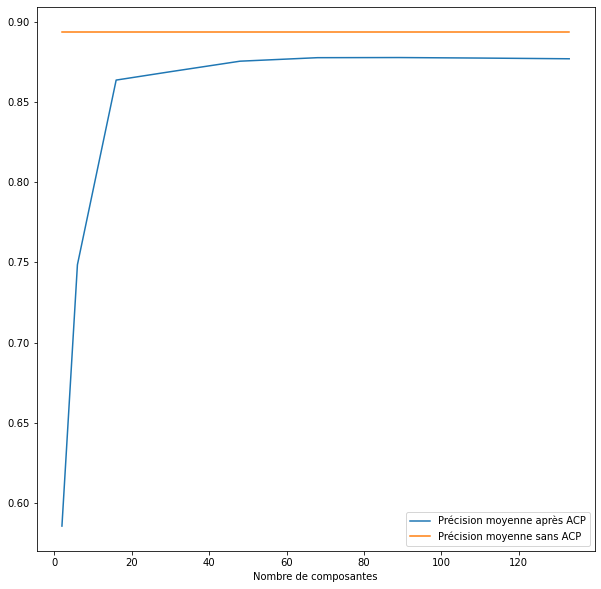

In [70]:
result.plot(x="Nombre de composantes", y=["Précision moyenne après ACP", "Précision moyenne sans ACP"],
        kind="line", figsize=(10, 10))

plt.show()

In [61]:
from sklearn import decomposition
n = 60
pca = decomposition.PCA(n_components= n)
pca.fit(X_scaled)
X_train_pca = pca.fit_transform(X_scaled)

In [62]:
# We can see that more than 60 dimensions doesn't improve the result

In [63]:
print(pca.explained_variance_ratio_.sum())

0.5023354568141362


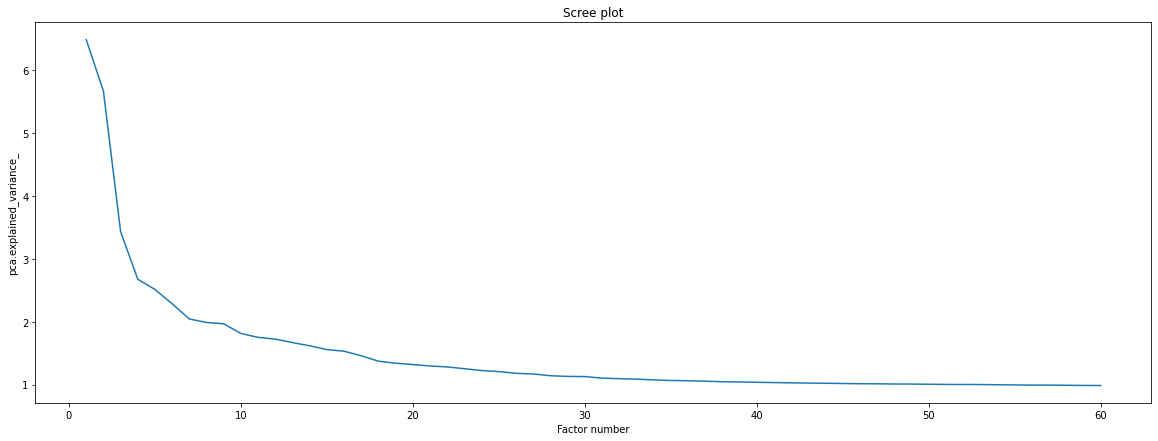

In [64]:
#scree plot
plt.plot(np.arange(1,61),pca.explained_variance_)
plt.title("Scree plot")
plt.ylabel("pca.explained_variance_")
plt.xlabel("Factor number")
plt.show()

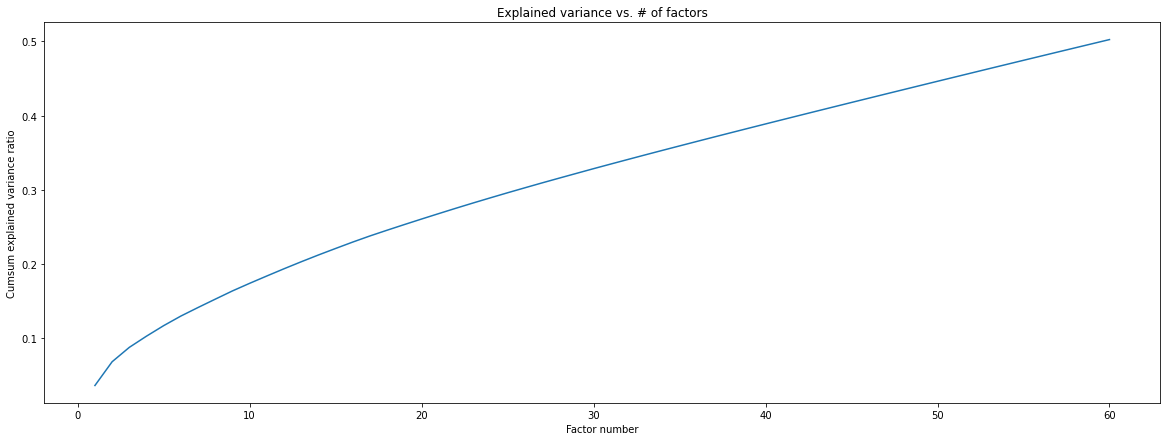

In [65]:
#cumul de variance expliquée
plt.plot(np.arange(1,61),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from statistics import mean, stdev
x = X
x_scaled = X_train_pca



start = time.time()


# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
    
    
end = time.time()
print('time :',end - start )

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

time : 9.614043235778809
List of possible accuracy: [0.9225182047852578, 0.9252117699509586, 0.9240043097042652, 0.9237070887204637, 0.9250260068360826, 0.9253418041313717, 0.9251188883935206, 0.925416109377322, 0.9209577946203001, 0.9244687174914549]

Maximum Accuracy That can be obtained from this model is: 92.5416109377322 %

Minimum Accuracy: 92.09577946203001 %

Overall Accuracy: 92.41770694010997 %

Standard Deviation is: 0.0014537880922713825


### XGBClassifier

In [108]:
df = pd.DataFrame(X_train_pca)
df = pd.concat([y, df], axis=1, join="inner")
df_sample = df.sample( n = 200000, random_state = 0)
y_partial = df_sample['TARGET'].values
X_train_pca_partial = df_sample.drop('TARGET', axis = 1).values

In [109]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_train_pca_partial, y_partial, test_size=0.30, random_state=42)

In [95]:
# fit xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.96508


# Weighted XGBoost for Class Imbalance

In [96]:
"""
The scale_pos_weight value is used to scale the gradient for the positive class.
This has the effect of scaling errors made by the model during training on the positive class and encourages the model 
to over-correct them. In turn, this can help the model achieve better performance when making predictions on the positive
class. Pushed too far, it may result in the model overfitting the positive class at the cost of worse performance on the 
negative class or both classes.
As such, the scale_pos_weight can be used to train a class-weighted or cost-sensitive version of XGBoost for imbalanced 
classification.
A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution.
For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight 
can be set to 100. This will give classification errors made by the model on the minority class (positive class) 100 times 
more impact, and in turn, 100 times more correction than errors made on the majority class.

"""
model = XGBClassifier(scale_pos_weight=90)

In [105]:

y = application_train_final['TARGET']
X = application_train_final.drop('TARGET', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [106]:
 from collections import Counter
# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 11.280


In [102]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

start = time.time()

# define model
model = XGBClassifier(scale_pos_weight=90)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
elapsed = int(time.time() - start)
print(elapsed, " seconds")

Mean ROC AUC: 0.69509


# grid search positive class weights with xgboost for imbalance classification

In [107]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
start = time.time()
# define model
model = XGBClassifier()
# define grid
weights = [1,3,5,7,9,11]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
elapsed = int(time.time() - start) 
print(elapsed, " seconds")

[19:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.743445 using {'scale_pos_weight': 1}
0.743445 (0.005566) with: {'scale_pos_weight': 1}
0.742690 (0.006172) with: {'scale_pos_weight': 3}
0.741218 (0.005526) with: {'scale_pos_weight': 5}
0.739939 (0.005939) with: {'scale_pos_weight': 7}
0.737776 (0.005639) with: {'scale_pos_weight': 9}
0.736473 (0.006352) with: {'scale_pos_weight': 11}
3249  seconds


# same with pca

In [ ]:
df = pd.DataFrame(X_train_pca)
df = pd.concat([y, df], axis=1, join="inner")
df_sample = df.sample( n = 200000, random_state = 0)
y_partial = df_sample['TARGET'].values
X_train_pca_partial = df_sample.drop('TARGET', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_pca_partial, y_partial, test_size=0.30, random_state=42)

In [110]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
start = time.time()
# define model
model = XGBClassifier()
# define grid
weights = [1,3,5,7,9,11]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
elapsed = int(time.time() - start) 
print(elapsed, " seconds")

[21:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.687807 using {'scale_pos_weight': 1}
0.687807 (0.007482) with: {'scale_pos_weight': 1}
0.686022 (0.006563) with: {'scale_pos_weight': 3}
0.682366 (0.008039) with: {'scale_pos_weight': 5}
0.680802 (0.006884) with: {'scale_pos_weight': 7}
0.678052 (0.007865) with: {'scale_pos_weight': 9}
0.676646 (0.006708) with: {'scale_pos_weight': 11}
4444  seconds


In [241]:
df = pd.DataFrame(X_train_pca)
df = pd.concat([y, df], axis=1, join="inner")
df_sample = df.sample( n = 200000, random_state = 0)
y_partial = df_sample['TARGET'].values
X_train_pca_partial = df_sample.drop('TARGET', axis = 1).values

In [242]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_train_pca_partial, y_partial, test_size=0.30, random_state=42)

In [243]:
X_train.shape

(140000, 60)

In [244]:
y_train.shape

(140000,)

In [245]:
import xgboost as xgb
from xgboost import XGBClassifier

import datetime
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

xgb1 = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)


parameters = parameters = {
    'max_depth': range (3, 9, 3),
    'n_estimators':  [200, 300,400],
    'learning_rate': [0.01, 0.1, 0.2]
}


xgb_grid = GridSearchCV(xgb1,
                        param_grid=parameters,
                        scoring = 'roc_auc',
                        n_jobs = 10,
                        cv = 5,
                        verbose=True
                        )
xgb_grid.fit(X_train,y_train)


model =  xgb_grid.best_estimator_

y_predict_train = xgb_grid.best_estimator_.predict(X_train)
y_predict_test = xgb_grid.best_estimator_.predict(X_test)

elapsed = int(time.time() - start)

print(elapsed, " seconds")
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(model.objective)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[22:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6344  seconds
0.9685089027508317
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}
binary:logistic


In [246]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

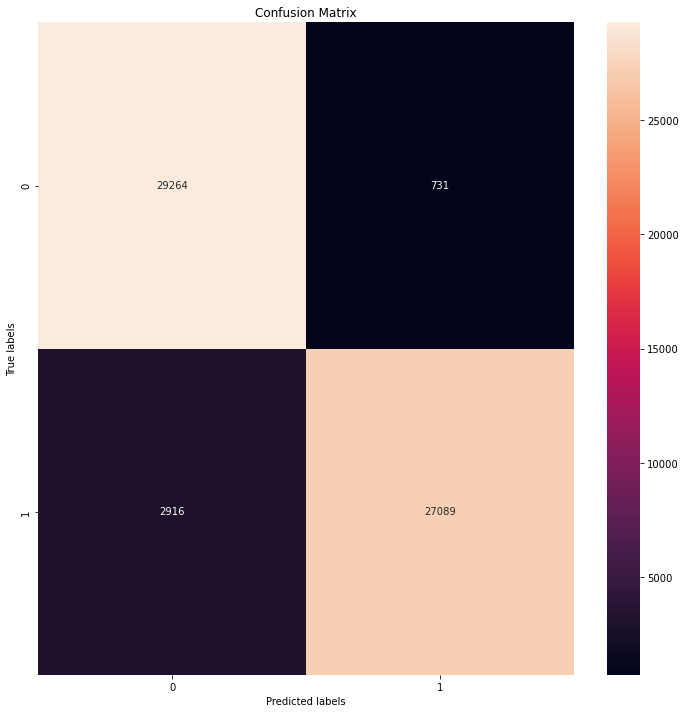

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.rcParams["figure.figsize"] = (8,8)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [248]:
### 2916 are wrongly predicted to be able to repay the credit (on 200000)

In [249]:
from sklearn.metrics import mean_squared_error
model.fit(X_train,y_train)
preds = model.predict(X_test)

errors = abs(preds - y_test)

print('XGBClassifier  Performances')
print("RMSE: %.2f" % mean_squared_error(y_test,preds, squared = False))
print('Average Error: {:0.4f}'.format(np.mean(errors)))


[22:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  Performances
RMSE: 0.25
Average Error: 0.0608
Accuracy = nan%.


In [250]:
best_model_XGB = xgb_grid.best_estimator_

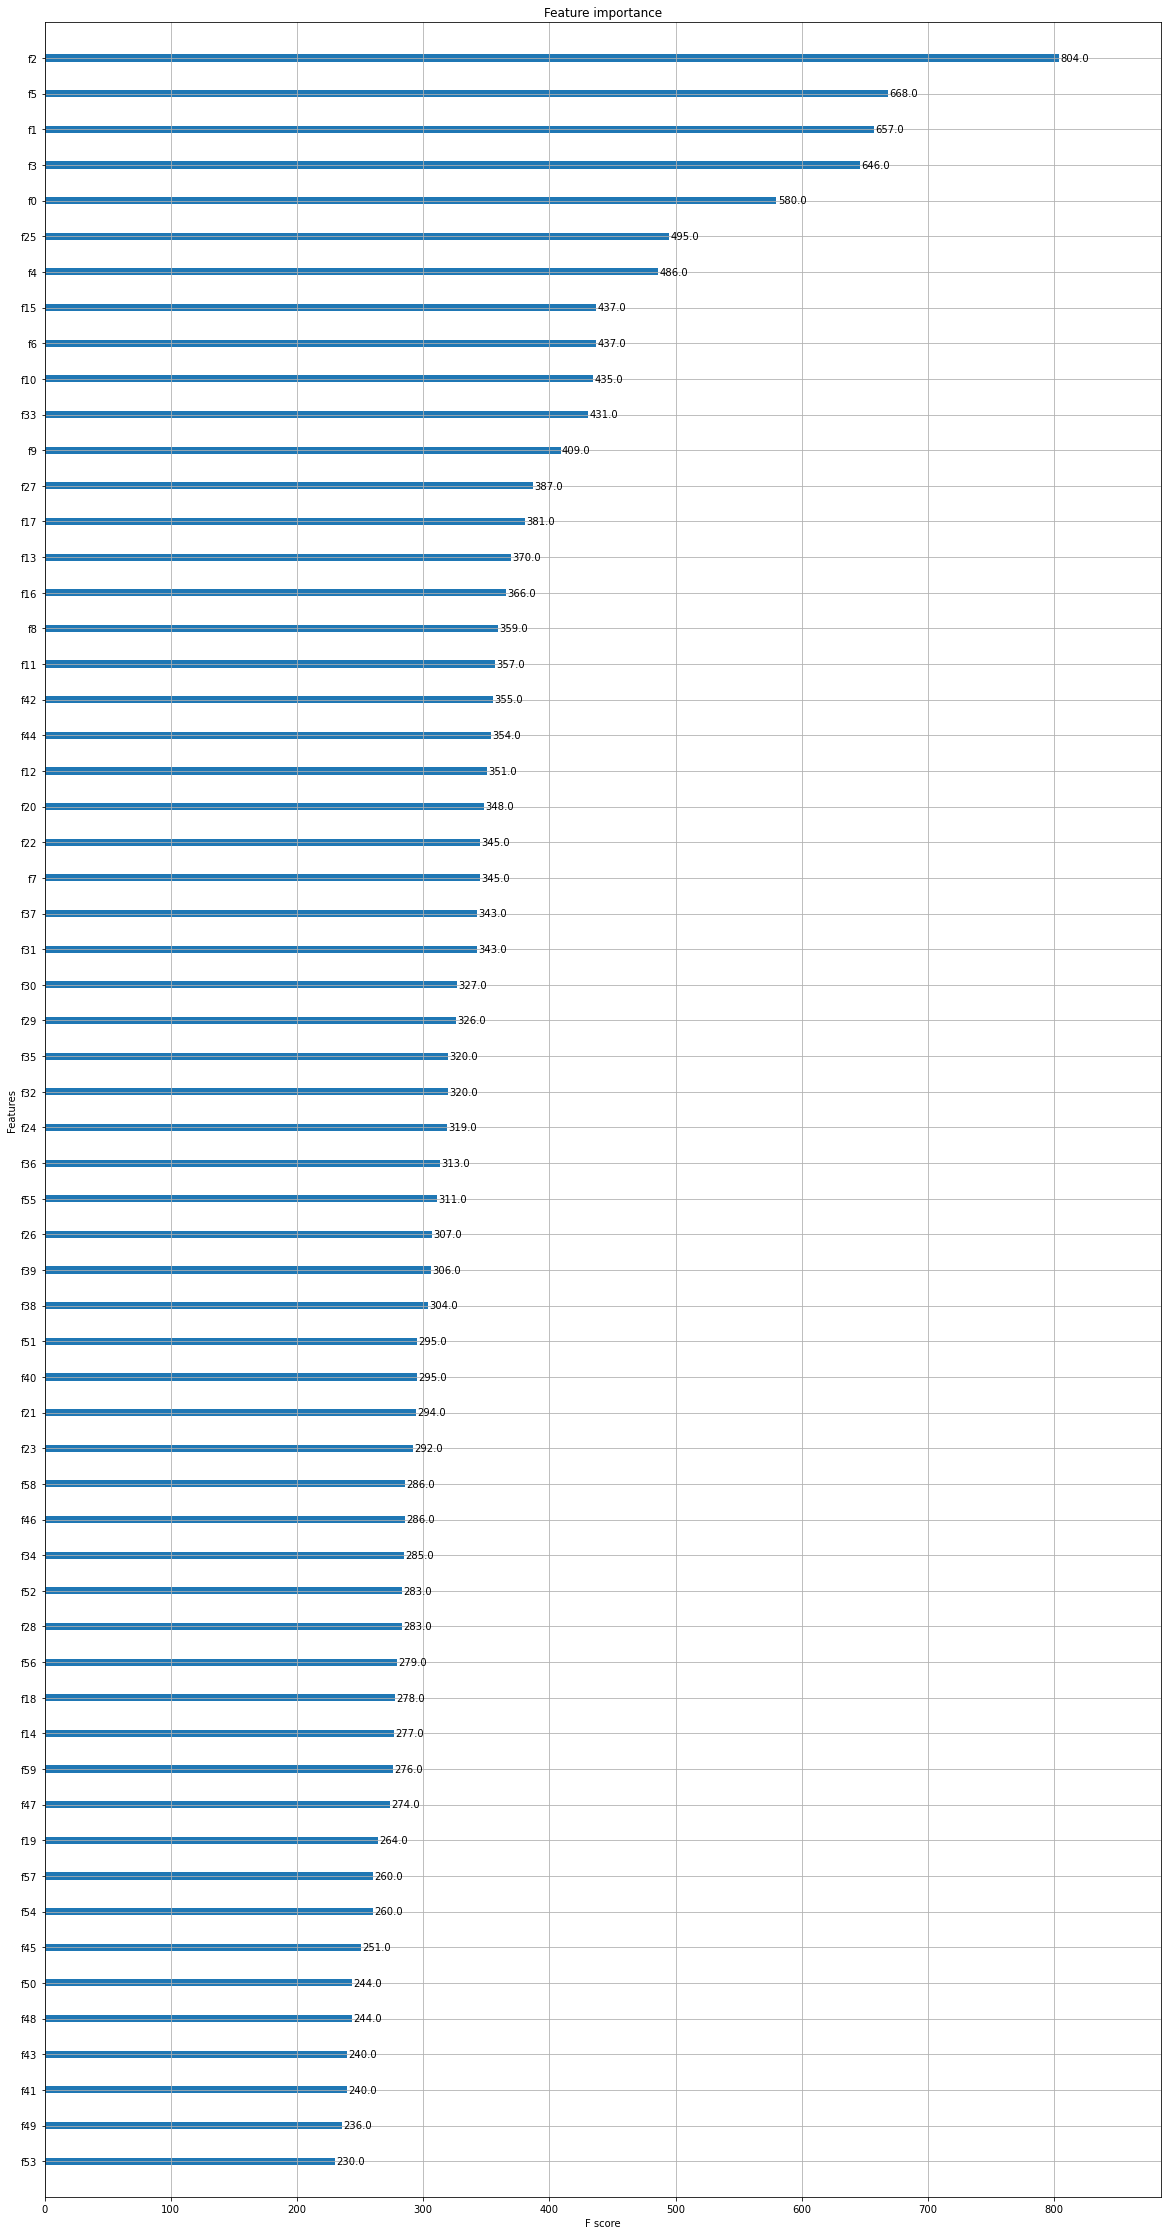

In [251]:
from xgboost import plot_importance

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (20,40)
plot_importance(model)
plt.show()

In [252]:
model.save_model("model.json")

In [253]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [254]:
from sklearn import metrics
def buildROC(y_test,preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

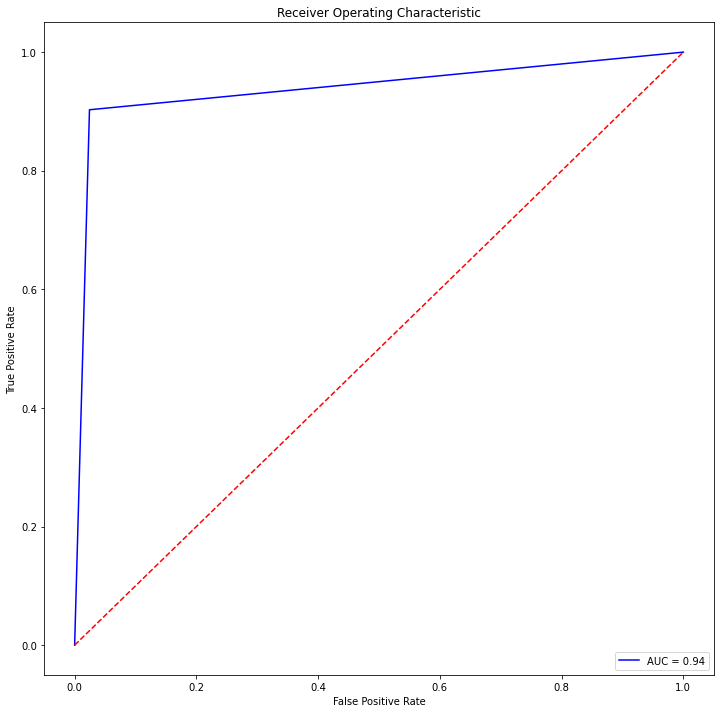

In [255]:
plt.rcParams["figure.figsize"] = (12,12)
buildROC(y_test,y_predict_test)

In [82]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [80]:
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (C:\Users\arnol\Anaconda3\lib\site-packages\sklearn\calibration.py)

In [71]:
y

0         1
1         0
2         0
3         0
4         0
         ..
538315    1
538316    1
538317    1
538318    1
538319    1
Name: TARGET, Length: 538320, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=42)

In [84]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
start = time.time()
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X_train, y_train)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)
elapsed = int(time.time() - start)
print(elapsed, " seconds")
len(calibrated_clf.calibrated_classifiers_)

4  seconds


3

In [85]:
calibrated_clf.predict_proba(X)[:5, :]

array([[0.35472797, 0.64527203],
       [0.52362614, 0.47637386],
       [0.44079579, 0.55920421],
       [0.48250289, 0.51749711],
       [0.42487479, 0.57512521]])

In [86]:
start = time.time()
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf,cv="prefit")
calibrated_clf.fit(X_calib, y_calib)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')
elapsed = int(time.time() - start)
print(elapsed, " seconds")
len(calibrated_clf.calibrated_classifiers_)

1  seconds


1

In [87]:
calibrated_clf.predict_proba([[-0.5, 0.5]])

ValueError: operands could not be broadcast together with shapes (1,2) (195,) 

In [ ]:
from sklearn.datasets import make_classification
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.calibration import CalibratedClassifierCV
>>> 
>>> base_clf = GaussianNB()
>>> calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
>>> calibrated_clf.fit(X, y)

In [ ]:
CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)
>>> len(calibrated_clf.calibrated_classifiers_)

In [ ]:
calibrated_clf.predict_proba(X)[:5, :]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:


3
>>> 
array([[0.110..., 0.889...],
       [0.072..., 0.927...],
       [0.928..., 0.071...],
       [0.928..., 0.071...],
       [0.071..., 0.928...]])
>>> 
>>> 
>>> X_train, X_calib, y_train, y_calib = train_test_split(
...        X, y, random_state=42
... )
>>> base_clf = GaussianNB()
>>> base_clf.fit(X_train, y_train)
GaussianNB()
>>> calibrated_clf = CalibratedClassifierCV(
...     base_estimator=base_clf,
...     cv="prefit"
... )
>>> calibrated_clf.fit(X_calib, y_calib)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')
>>> len(calibrated_clf.calibrated_classifiers_)
1
>>> calibrated_clf.predict_proba([[-0.5, 0.5]])
array([[0.936..., 0.063...]])

In [ ]:
from sklearn.linear_model import LogisticRegression
>>> X, y = load_iris(return_X_y=True)
>>> clf = LogisticRegression(random_state=0).fit(X, y)
>>> clf.predict(X[:2, :])
array([0, 0])
>>> clf.predict_proba(X[:2, :])
array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
       [9.7...e-01, 2.8...e-02, ...e-08]])
>>> clf.score(X, y)